# Generació gràfiques velocitat vent amb rotor i levitació magnètica amb efecte superconductor

Importació llibreries essencials.

In [104]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Importació dades, que es troben en un fitxer tipus `.csv`.

In [105]:
data = pd.read_csv('Resultats_Vents_Levitació.csv', delimiter = ";")
data = pd.DataFrame(data)
#Afegirem un marcador per saber que aquesta experimentació és amb l'efecte superconductor
data.insert(0,"Levitació", 1)
data

,Levitació,Amb Rotor,Distància (cm),Potència,Dalt-Esquerra,Dalt-Mig,Dalt-Dreta,Mig-Esquerra,Mig-Mig,Mig-Dreta,Baix-Esquerra,Baix-Mig,Baix-Dreta
0,1,1,24,1,7,"9,2","9,2","10,1",6,"7,4",11,"8,8",6
1,1,1,24,2,"8,2","11,2",11,"11,3","5,2","7,9",12,"9,2","6,8"
2,1,1,24,3,"7,8","10,4","12,1","12,4",5,"8,8","12,4","10,3","7,2"


Per poder comparar amb el cas on el rotor no estava en suspensió i el cas sense rotor, anem a importar aquestes dades des del fitxer anterior. Farem servir les configuracions amb la mateixa distància.

In [106]:
data2 = pd.read_csv('./../Diagrames_Vents/Dades_vents.csv', delimiter = ";")
data2 = data2[data2["Distància (cm)"] == 24]
data2 = pd.DataFrame(data2)
#Afegirem un marcador per saber que aquesta experimentació NO és amb l'efecte superconductor
data2.insert(0,"Levitació", 0)
#Concatenació de Datasets
data = pd.concat([data, data2], ignore_index = True)
data = data.sort_values(["Amb Rotor", "Levitació"])
data

,Levitació,Amb Rotor,Distància (cm),Potència,Dalt-Esquerra,Dalt-Mig,Dalt-Dreta,Mig-Esquerra,Mig-Mig,Mig-Dreta,Baix-Esquerra,Baix-Mig,Baix-Dreta
3,0,0,24,1,"14,4","13,4","14,4","14,4",9,"14,4","14,4","13,4","14,4"
4,0,0,24,2,"15,8","14,9","15,8","15,8","10,4","15,8","15,8","14,9","15,8"
5,0,0,24,3,"16,6",16,"16,6","16,9","11,5","16,9","16,6",16,"16,6"
6,0,1,24,1,"6,5",9,"10,1","8,6","5,8","10,1","10,1","8,3",4
7,0,1,24,2,"8,6","10,8","11,5",9,"7,6","10,8",11,"8,6","4,3"
8,0,1,24,3,"8,6","11,3","12,6","10,3","8,8",11,12,"8,8",5
0,1,1,24,1,7,"9,2","9,2","10,1",6,"7,4",11,"8,8",6
1,1,1,24,2,"8,2","11,2",11,"11,3","5,2","7,9",12,"9,2","6,8"
2,1,1,24,3,"7,8","10,4","12,1","12,4",5,"8,8","12,4","10,3","7,2"


Creació de funció que ens permet extreure les dades per fila i agregar-les en una estructura de dades.

In [107]:
def getInfo(dataFrameDades):
    #Funció que extreu informació de cada fila
    matrices = []
    for _, row in dataFrameDades.iterrows():
        levitacio = int(row["Levitació"])
        ambRotor = int(row["Amb Rotor"])
        distancia = int(row["Distància (cm)"])
        potencia = int(row["Potència"])
        velocitats = [float(v.replace(',', '.')) for v in row.iloc[4:13]]
        matriu = np.array(velocitats).reshape(numFiles, numCols)
        matrices.append((matriu, levitacio, ambRotor, distancia, potencia))
    return matrices

Creació de les gràfiques.

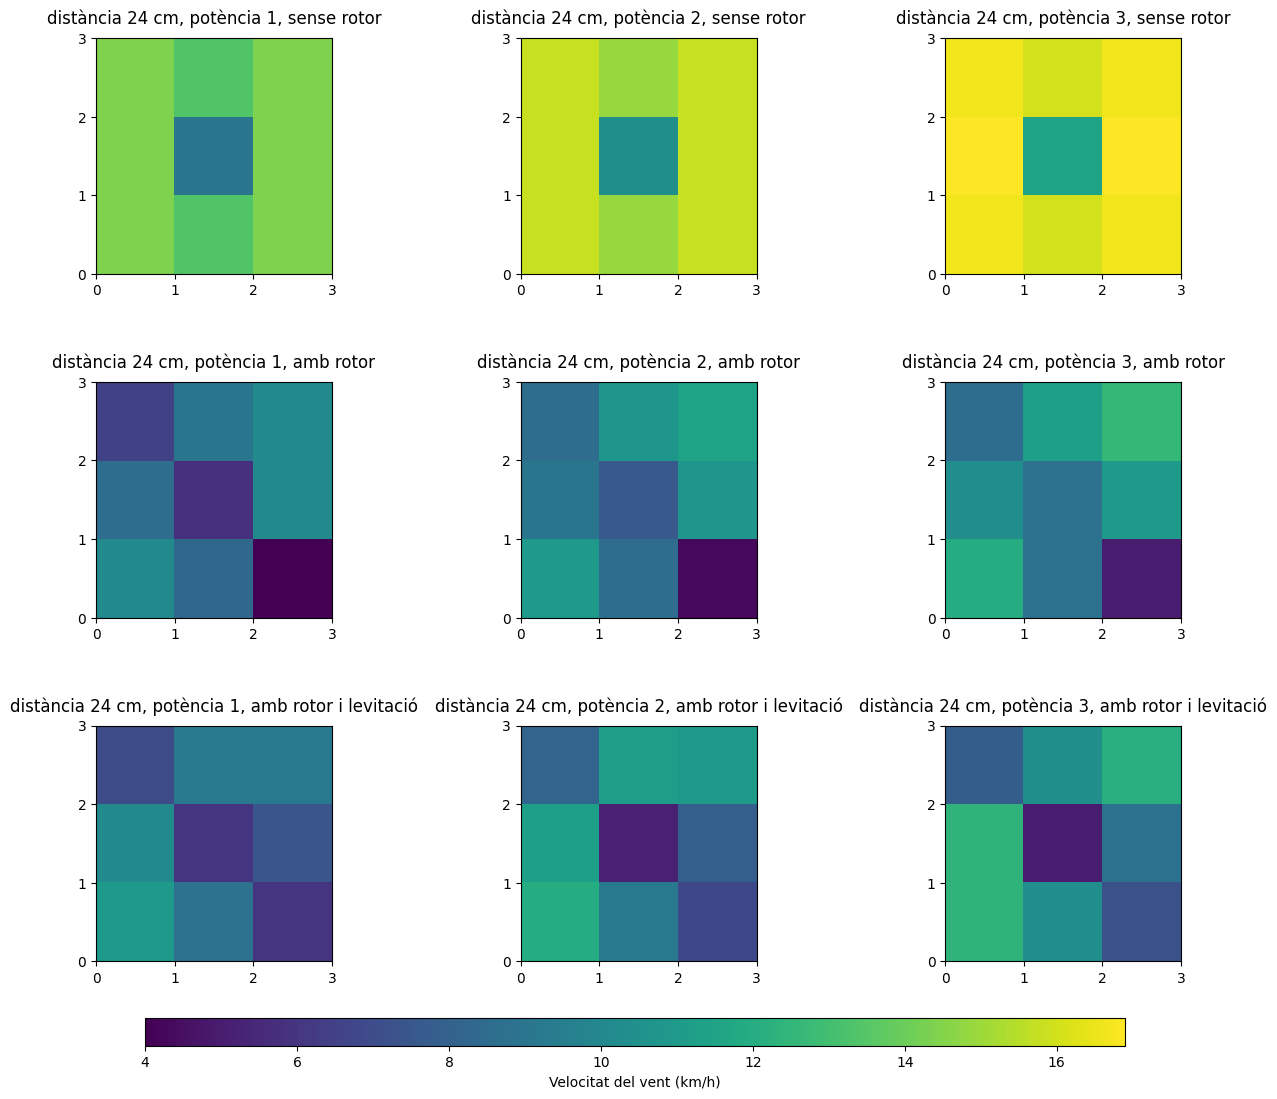

In [108]:
numFiles = 3  # Subdivisions eix vertical
numCols = 3   # Subdivisions eix horitzontal

def creaGraficVelocitats(levitacio, ambRotor, distancia, potencia, matriu, ax, vmin, vmax):
    if levitacio == 1:
        leviText = ' i levitació'
    else:
        leviText = ''
    
    if ambRotor == 0:
        text = 'sense'
    else:
        text = 'amb'
    
    # Visualització de la matriu amb títol i etiquetes
    cax = ax.imshow(matriu, cmap='viridis', origin='upper', vmin=vmin, vmax=vmax)
    
    # Configura les marques als marges de les columnes i files
    x_ticks = np.arange(0, numCols + 1)  # Ajustar marques al final de les columnes
    y_ticks = np.arange(0, numFiles + 1)  # Ajustar marques al final de les files
    ax.set_xticks(x_ticks - 0.5)
    ax.set_yticks(y_ticks - 0.5)

    # Etiquetes de les marques
    ax.set_xticklabels([f'{i}' for i in range(0, numCols + 1)])
    ax.set_yticklabels([f'{i}' for i in reversed(range(0, numFiles + 1 ))])

    ax.set_title(f'distància {distancia} cm, potència {potencia}, {text} rotor{leviText}', pad = 10)
    return cax

# Llista per emmagatzemar totes les matrius i altres paràmetres
matrices = getInfo(data)

# Càlcul rang de valors dels gràfics, trobant el valor mínim i màxim de velocitat del vent
vmin = min(matriz.min() for matriz, _, _, _, _ in matrices)
vmax = max(matriz.max() for matriz, _, _, _, _ in matrices)

# Nombre de files i columnes que hi haurà al gràfic. Sabem que farem 12
numColsGrafic = 3
numFilesGrafic = 3

# La figura es composarà de diverses gràfiques
fig, axs = plt.subplots(nrows=numFilesGrafic, ncols=numColsGrafic, figsize=(14, 14))

# Aplanem la matriu de subgràfics en una llista per facilitar-ne l'accés
axs = axs.flatten()

# Crea els gràfics a la quadrícula de subgràfics
for idx, (matriu, levitacio, ambRotor, distancia, potencia) in enumerate(matrices):
    cax = creaGraficVelocitats(levitacio, ambRotor, distancia, potencia, matriu, axs[idx], vmin, vmax)

# Afegeix la barra de colors al final de la figura
fig.subplots_adjust(bottom=0.2)  # Ajusta l'espai inferior
cbar_ax = fig.add_axes([0.16, 0.15, 0.7, 0.02])  # [esquerra, avall, amplada, alçada]
fig.colorbar(cax, cax=cbar_ax, orientation='horizontal', label='Velocitat del vent (km/h)')

# Ajusta l'espaiat entre subgràfics
plt.subplots_adjust(hspace=0.3, wspace=0.8)

filename = "Gràfica Velocitats vents amb levitació experiments.png"

plt.savefig(filename, dpi = 150, bbox_inches='tight')

# Mostra els gràfics
plt.show()


Codi per crear la taula amb format $\LaTeX$ al document. Abans, però, en comptes de posar zeros i uns per indicar si tenim rotor o no, ho posarem en format Sí/No.

In [109]:
data["Amb Rotor"] = data["Amb Rotor"].apply(lambda ele: "No" if ele == 0 else "Sí")
data["Levitació"] = data["Levitació"].apply(lambda ele: "No" if ele == 0 else "Sí")
data

,Levitació,Amb Rotor,Distància (cm),Potència,Dalt-Esquerra,Dalt-Mig,Dalt-Dreta,Mig-Esquerra,Mig-Mig,Mig-Dreta,Baix-Esquerra,Baix-Mig,Baix-Dreta
3,No,No,24,1,"14,4","13,4","14,4","14,4",9,"14,4","14,4","13,4","14,4"
4,No,No,24,2,"15,8","14,9","15,8","15,8","10,4","15,8","15,8","14,9","15,8"
5,No,No,24,3,"16,6",16,"16,6","16,9","11,5","16,9","16,6",16,"16,6"
6,No,Sí,24,1,"6,5",9,"10,1","8,6","5,8","10,1","10,1","8,3",4
7,No,Sí,24,2,"8,6","10,8","11,5",9,"7,6","10,8",11,"8,6","4,3"
8,No,Sí,24,3,"8,6","11,3","12,6","10,3","8,8",11,12,"8,8",5
0,Sí,Sí,24,1,7,"9,2","9,2","10,1",6,"7,4",11,"8,8",6
1,Sí,Sí,24,2,"8,2","11,2",11,"11,3","5,2","7,9",12,"9,2","6,8"
2,Sí,Sí,24,3,"7,8","10,4","12,1","12,4",5,"8,8","12,4","10,3","7,2"


In [114]:
print(data[data["Levitació"] == "Sí"].iloc[:,1:].to_latex(index = False))

\begin{tabular}{lrrlllllllll}
\toprule
Amb Rotor & Distància (cm) & Potència & Dalt-Esquerra & Dalt-Mig & Dalt-Dreta & Mig-Esquerra & Mig-Mig & Mig-Dreta & Baix-Esquerra & Baix-Mig & Baix-Dreta \\
\midrule
Sí & 24 & 1 & 7 & 9,2 & 9,2 & 10,1 & 6 & 7,4 & 11 & 8,8 & 6 \\
Sí & 24 & 2 & 8,2 & 11,2 & 11 & 11,3 & 5,2 & 7,9 & 12 & 9,2 & 6,8 \\
Sí & 24 & 3 & 7,8 & 10,4 & 12,1 & 12,4 & 5 & 8,8 & 12,4 & 10,3 & 7,2 \\
\bottomrule
\end{tabular}



In [115]:
print(data.to_latex(index = False))

\begin{tabular}{llrrlllllllll}
\toprule
Levitació & Amb Rotor & Distància (cm) & Potència & Dalt-Esquerra & Dalt-Mig & Dalt-Dreta & Mig-Esquerra & Mig-Mig & Mig-Dreta & Baix-Esquerra & Baix-Mig & Baix-Dreta \\
\midrule
No & No & 24 & 1 & 14,4 & 13,4 & 14,4 & 14,4 & 9 & 14,4 & 14,4 & 13,4 & 14,4 \\
No & No & 24 & 2 & 15,8 & 14,9 & 15,8 & 15,8 & 10,4 & 15,8 & 15,8 & 14,9 & 15,8 \\
No & No & 24 & 3 & 16,6 & 16 & 16,6 & 16,9 & 11,5 & 16,9 & 16,6 & 16 & 16,6 \\
No & Sí & 24 & 1 & 6,5 & 9 & 10,1 & 8,6 & 5,8 & 10,1 & 10,1 & 8,3 & 4 \\
No & Sí & 24 & 2 & 8,6 & 10,8 & 11,5 & 9 & 7,6 & 10,8 & 11 & 8,6 & 4,3 \\
No & Sí & 24 & 3 & 8,6 & 11,3 & 12,6 & 10,3 & 8,8 & 11 & 12 & 8,8 & 5 \\
Sí & Sí & 24 & 1 & 7 & 9,2 & 9,2 & 10,1 & 6 & 7,4 & 11 & 8,8 & 6 \\
Sí & Sí & 24 & 2 & 8,2 & 11,2 & 11 & 11,3 & 5,2 & 7,9 & 12 & 9,2 & 6,8 \\
Sí & Sí & 24 & 3 & 7,8 & 10,4 & 12,1 & 12,4 & 5 & 8,8 & 12,4 & 10,3 & 7,2 \\
\bottomrule
\end{tabular}



In [77]:
data[4:13].dtypes

Levitació         object
Amb Rotor         object
Distància (cm)     int64
Potència           int64
Dalt-Esquerra     object
Dalt-Mig          object
Dalt-Dreta        object
Mig-Esquerra      object
Mig-Mig           object
Mig-Dreta         object
Baix-Esquerra     object
Baix-Mig          object
Baix-Dreta        object
dtype: object

In [118]:
data = data.replace(',','.', regex = True)

In [119]:
# Convertex dades numèriques de les velocitats a tipus float
for col in data.columns[3:]:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Verifica que les dades estiguin en el format correcte per fer operació després
print(data.dtypes)

Levitació          object
Amb Rotor          object
Distància (cm)      int64
Potència            int64
Dalt-Esquerra     float64
Dalt-Mig          float64
Dalt-Dreta        float64
Mig-Esquerra      float64
Mig-Mig           float64
Mig-Dreta         float64
Baix-Esquerra     float64
Baix-Mig          float64
Baix-Dreta        float64
dtype: object


In [120]:
data["vel avg"] = data.iloc[:,4:13].mean(axis = 1)

In [121]:
dataALT = data[data["Amb Rotor" ]== "Sí"]

In [122]:
dataALT

,Levitació,Amb Rotor,Distància (cm),Potència,Dalt-Esquerra,Dalt-Mig,Dalt-Dreta,Mig-Esquerra,Mig-Mig,Mig-Dreta,Baix-Esquerra,Baix-Mig,Baix-Dreta,vel avg
6,No,Sí,24,1,6.5,9.0,10.1,8.6,5.8,10.1,10.1,8.3,4.0,8.055556
7,No,Sí,24,2,8.6,10.8,11.5,9.0,7.6,10.8,11.0,8.6,4.3,9.133333
8,No,Sí,24,3,8.6,11.3,12.6,10.3,8.8,11.0,12.0,8.8,5.0,9.822222
0,Sí,Sí,24,1,7.0,9.2,9.2,10.1,6.0,7.4,11.0,8.8,6.0,8.300000
1,Sí,Sí,24,2,8.2,11.2,11.0,11.3,5.2,7.9,12.0,9.2,6.8,9.200000
2,Sí,Sí,24,3,7.8,10.4,12.1,12.4,5.0,8.8,12.4,10.3,7.2,9.600000


In [123]:
data = data.sort_values(["Amb Rotor", "Levitació"])

In [124]:
data

,Levitació,Amb Rotor,Distància (cm),Potència,Dalt-Esquerra,Dalt-Mig,Dalt-Dreta,Mig-Esquerra,Mig-Mig,Mig-Dreta,Baix-Esquerra,Baix-Mig,Baix-Dreta,vel avg
3,No,No,24,1,14.4,13.4,14.4,14.4,9.0,14.4,14.4,13.4,14.4,13.577778
4,No,No,24,2,15.8,14.9,15.8,15.8,10.4,15.8,15.8,14.9,15.8,15.000000
5,No,No,24,3,16.6,16.0,16.6,16.9,11.5,16.9,16.6,16.0,16.6,15.966667
6,No,Sí,24,1,6.5,9.0,10.1,8.6,5.8,10.1,10.1,8.3,4.0,8.055556
7,No,Sí,24,2,8.6,10.8,11.5,9.0,7.6,10.8,11.0,8.6,4.3,9.133333
8,No,Sí,24,3,8.6,11.3,12.6,10.3,8.8,11.0,12.0,8.8,5.0,9.822222
0,Sí,Sí,24,1,7.0,9.2,9.2,10.1,6.0,7.4,11.0,8.8,6.0,8.300000
1,Sí,Sí,24,2,8.2,11.2,11.0,11.3,5.2,7.9,12.0,9.2,6.8,9.200000
2,Sí,Sí,24,3,7.8,10.4,12.1,12.4,5.0,8.8,12.4,10.3,7.2,9.600000


In [125]:
print(data.to_latex(index = False))

\begin{tabular}{llrrrrrrrrrrrr}
\toprule
Levitació & Amb Rotor & Distància (cm) & Potència & Dalt-Esquerra & Dalt-Mig & Dalt-Dreta & Mig-Esquerra & Mig-Mig & Mig-Dreta & Baix-Esquerra & Baix-Mig & Baix-Dreta & vel avg \\
\midrule
No & No & 24 & 1 & 14.400000 & 13.400000 & 14.400000 & 14.400000 & 9.000000 & 14.400000 & 14.400000 & 13.400000 & 14.400000 & 13.577778 \\
No & No & 24 & 2 & 15.800000 & 14.900000 & 15.800000 & 15.800000 & 10.400000 & 15.800000 & 15.800000 & 14.900000 & 15.800000 & 15.000000 \\
No & No & 24 & 3 & 16.600000 & 16.000000 & 16.600000 & 16.900000 & 11.500000 & 16.900000 & 16.600000 & 16.000000 & 16.600000 & 15.966667 \\
No & Sí & 24 & 1 & 6.500000 & 9.000000 & 10.100000 & 8.600000 & 5.800000 & 10.100000 & 10.100000 & 8.300000 & 4.000000 & 8.055556 \\
No & Sí & 24 & 2 & 8.600000 & 10.800000 & 11.500000 & 9.000000 & 7.600000 & 10.800000 & 11.000000 & 8.600000 & 4.300000 & 9.133333 \\
No & Sí & 24 & 3 & 8.600000 & 11.300000 & 12.600000 & 10.300000 & 8.800000 & 11.0000

In [117]:
data

,Levitació,Amb Rotor,Distància (cm),Potència,Dalt-Esquerra,Dalt-Mig,Dalt-Dreta,Mig-Esquerra,Mig-Mig,Mig-Dreta,Baix-Esquerra,Baix-Mig,Baix-Dreta
3,No,No,24,1,"14,4","13,4","14,4","14,4",9,"14,4","14,4","13,4","14,4"
4,No,No,24,2,"15,8","14,9","15,8","15,8","10,4","15,8","15,8","14,9","15,8"
5,No,No,24,3,"16,6",16,"16,6","16,9","11,5","16,9","16,6",16,"16,6"
6,No,Sí,24,1,"6,5",9,"10,1","8,6","5,8","10,1","10,1","8,3",4
7,No,Sí,24,2,"8,6","10,8","11,5",9,"7,6","10,8",11,"8,6","4,3"
8,No,Sí,24,3,"8,6","11,3","12,6","10,3","8,8",11,12,"8,8",5
0,Sí,Sí,24,1,7,"9,2","9,2","10,1",6,"7,4",11,"8,8",6
1,Sí,Sí,24,2,"8,2","11,2",11,"11,3","5,2","7,9",12,"9,2","6,8"
2,Sí,Sí,24,3,"7,8","10,4","12,1","12,4",5,"8,8","12,4","10,3","7,2"
